# Data Mining Week 11 Class Practice
# Rayna Shera Chang / 0706022310022

## **Import Library**

In [123]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## **Load Dataset**

In [124]:
# Load dataset
data = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(data)

# Preview the dataset
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [125]:
# Check shape of the dataset
df.shape

(225, 10)

In [126]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [127]:
# View the statistical summary of numerical variables
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


### **Data Preparation**

In [128]:
df.drop(columns=["Other names"], inplace=True)

In [129]:
df = df.rename(columns={
    'Tot\xa0Cases//1M pop': 'Total Cases/1M Population',
    'Tot\xa0Deaths/1M pop': 'Total Deaths/1M Population'
})

In [130]:
# Check for missing values in dataset
df.isnull().sum()

,0
Country,0
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Total Cases/1M Population,0
Total Deaths/1M Population,0
Death percentage,0


In [131]:
# Check for duplicate rows in dataset
df[df.duplicated(keep=False)]

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage


## **Exploratory Data Analysis**

In [132]:
# World Map Visualization
fig = px.choropleth(df,
                    locations="ISO 3166-1 alpha-3 CODE",
                    color="Continent",
                    hover_name="Country",
                    projection="natural earth",
                    title="World Map of Countries by Continent"
)
fig.show()

* This choropleth map visualizes the global distribution of countries grouped by continent, allowing us to see how nations are geographically organized across the world.
* The color separation highlights clear regional clusters such as Europe in red, Africa in green, and Asia in blue, making it easier to distinguish continental boundaries and compare regional groupings.
* The map also shows how certain continents like Oceania and Northern America consist of widely dispersed island nations and territories, emphasizing their geographic spread.

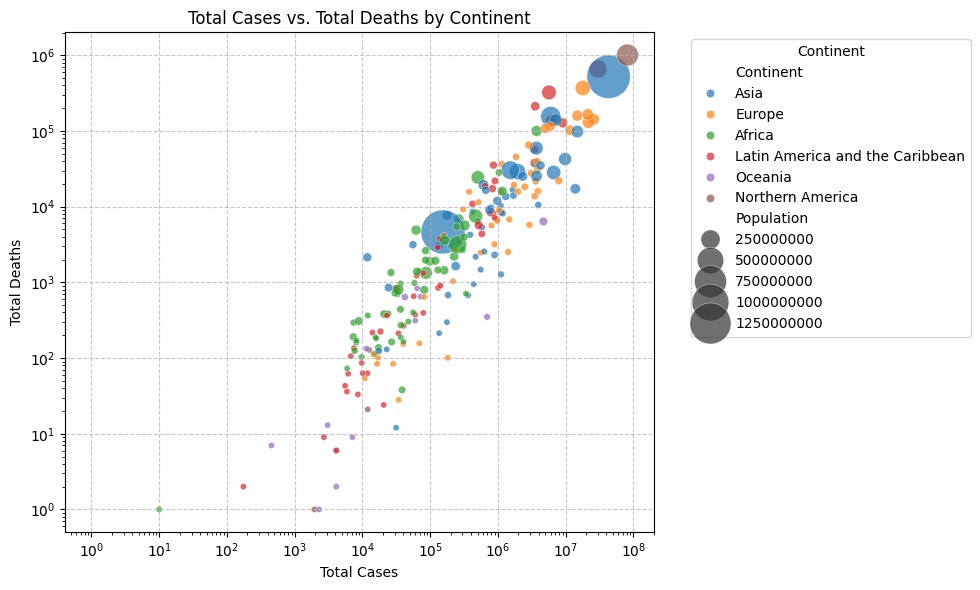

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Cases', y='Total Deaths', data=df, hue='Continent', size='Population', sizes=(20, 1000), alpha=0.7)
plt.title('Total Cases vs. Total Deaths by Continent')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.xscale('log') # Use log scale for better visualization due to wide range of values
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* This scatter plot shows a strong positive relationship between total COVID-19 cases and total deaths, indicating that countries with higher infection counts generally experience higher fatality counts.
* The bubble sizes represent population, and the plot reveals that highly populated countries tend to cluster toward the upper-right region where both cases and deaths are high.
* Each continent forms its own spread pattern, showing that some regions such as Europe and Asia have higher overall case and death numbers, while regions like Oceania remain in the lower range.

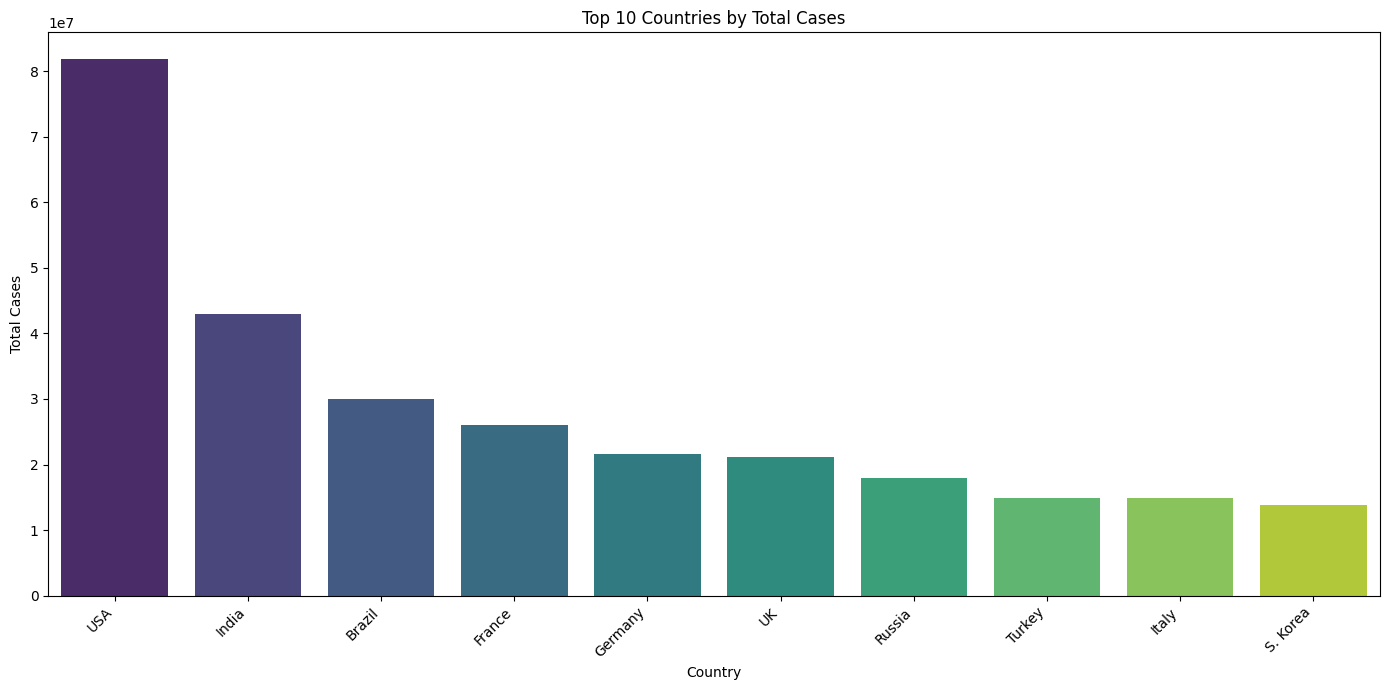

In [134]:
# Sort by 'Total Cases' and get the top 10 countries
top_10_cases = df.nlargest(10, 'Total Cases')

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Total Cases', data=top_10_cases, palette='viridis', hue='Country', legend=False)
plt.title('Top 10 Countries by Total Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* This bar chart shows the ten countries with the highest total COVID-19 cases, with the United States having by far the largest number of infections compared to all other nations.
* India and Brazil follow as the next most affected countries, indicating that highly populated nations experienced significant case burdens during the pandemic.
* European countries such as France, Germany, the UK, and Italy also appear in the top ten, showing that the pandemic had a strong impact across multiple regions, not just in a single continent.

## **New df for Modeling**

In [135]:
df_model = df.copy()
df_model = df.drop(columns=[
    'Country',
    'ISO 3166-1 alpha-3 CODE'
])
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  225 non-null    int64  
 1   Continent                   225 non-null    object 
 2   Total Cases                 225 non-null    int64  
 3   Total Deaths                225 non-null    int64  
 4   Total Cases/1M Population   225 non-null    int64  
 5   Total Deaths/1M Population  225 non-null    int64  
 6   Death percentage            225 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 12.4+ KB


### **Data Encoding**

In [136]:
# Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Continent']
encoder = OrdinalEncoder()
df_model[nominal_cols] = encoder.fit_transform(df_model[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_model.sample(n = 5)

{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5}}


,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage
200,62710097,0.0,33815,800,539,13,2.365814
68,907817,5.0,64422,834,70964,919,1.294589
66,49188,2.0,34237,28,696044,569,0.081783
61,1483588,0.0,15903,183,10719,123,1.150726
205,1407422,3.0,138425,3756,98354,2669,2.713383


## **Clustering Modeling**

### **Data Scaling**

In [140]:
# Scale dataset with standard scaler
# Numerical Columns
num_cols = ['Population', 'Total Cases', 'Total Deaths', 'Total Cases/1M Population','Total Deaths/1M Population', 'Death percentage']

# Categorical Columns
cat_cols = ['Continent']

sc = StandardScaler()

df_scaled_num = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)
df_model = pd.concat([df_scaled_num, df_model[cat_cols].reset_index(drop=True)], axis=1)
df_model.head()

,Population,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage,Continent
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1.0
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2.0
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0.0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2.0
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0.0


### **K-Means Clustering**

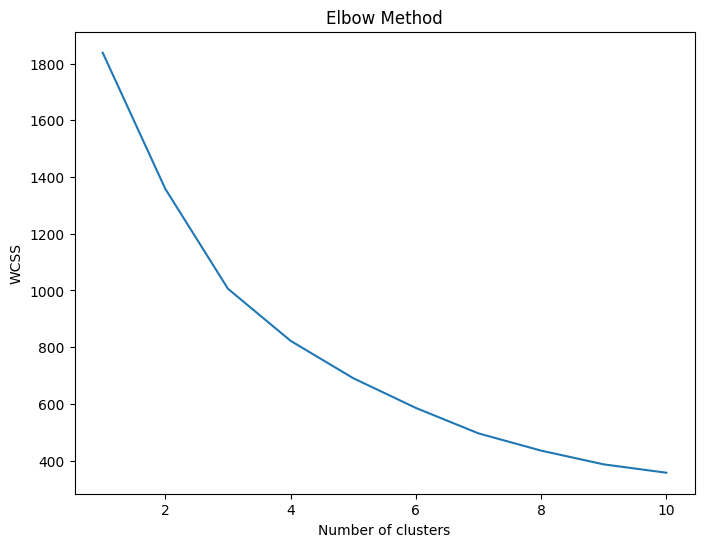

In [141]:
wcss = []
for i in range(1, 11): # Clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_model)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [142]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
wcss_table

,Number of Clusters,WCSS
0,1,1838.062222
1,2,1357.921919
2,3,1005.938854
3,4,822.409390
4,5,690.698659
5,6,585.817789
6,7,496.095972
7,8,435.311756
8,9,386.825189
9,10,357.382521


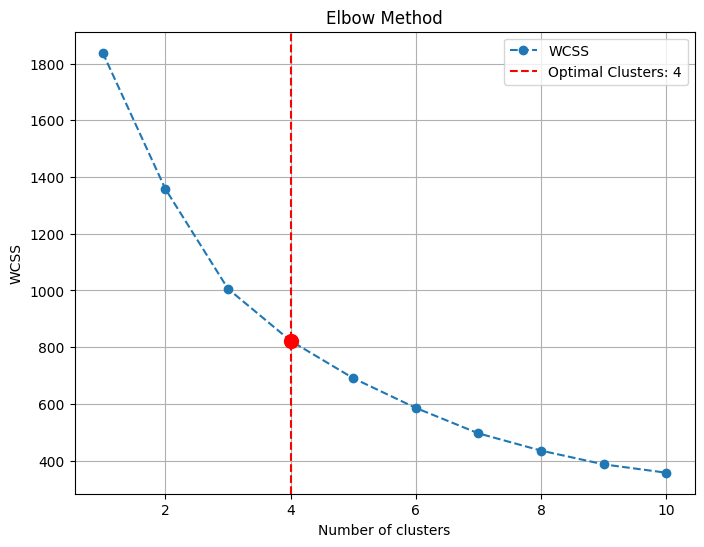

The optimal number of clusters is: 4


In [143]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5) # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [144]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
kmeans_clusters = kmeans.fit_predict(df_model)

# Add the cluster labels to the DataFrame
df['K-Means_Cluster'] = kmeans_clusters

# Show the df
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage,K-Means_Cluster
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,2
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0


In [151]:
# Calculate Silhouette Score for K-Means Cluster
silhouette_kmeans = silhouette_score(df_model, df['K-Means_Cluster'])
print(f"Silhouette Score for K-Means Cluster: {silhouette_kmeans}")

Silhouette Score for K-Means Cluster: 0.37875911216109187


### **Hierarchical Agglomerative Clustering**

Skipping Ward linkage with Manhattan metric (not supported).


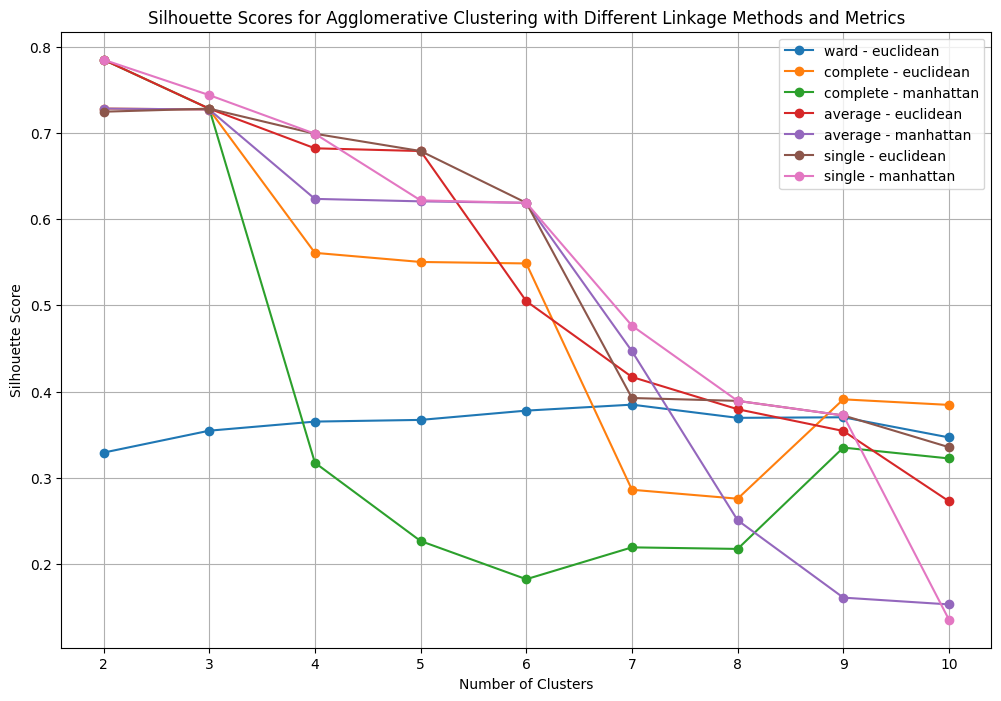

Best Silhouette Score: 0.7851185820031913
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: manhattan


In [146]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_model)
            silhouette_avg = silhouette_score(df_model, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [147]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_model)

In [148]:
# Evaluation
ss = silhouette_score(df_model, y_hc)
print(ss)

0.7851185820031913


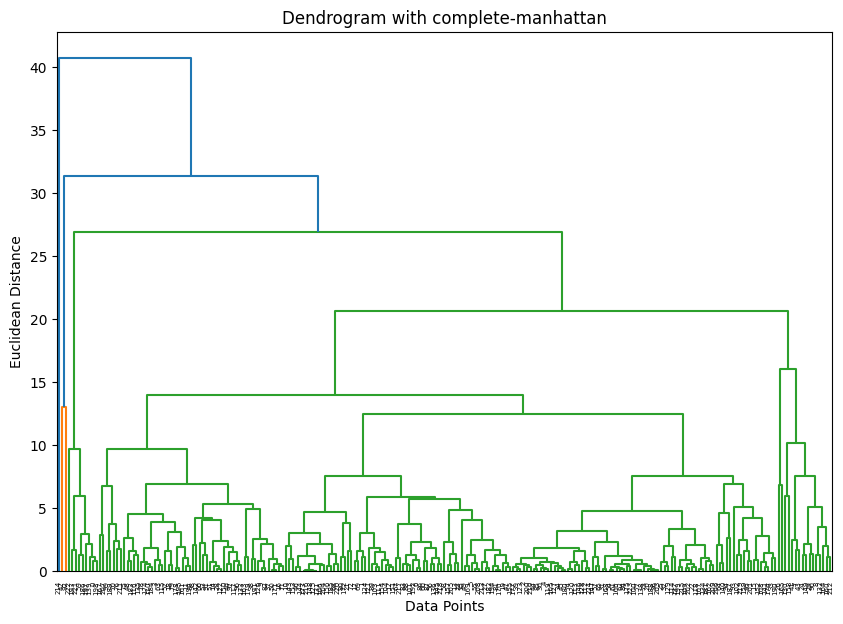

In [150]:
# Best Combination Parameter
fixed_metric = "cityblock" if best_metric == "manhattan" else best_metric

linked = linkage(df_model, method=best_linkage, metric=fixed_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [152]:
# Add the cluster labels to the original data
df['Hierarchical_Cluster'] = y_hc

# Analyze the clusters with the original values
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage,K-Means_Cluster,Hierarchical_Cluster
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1,0
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,2,0
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0,0


## **Model Evaluation**

### **Cluster Summary**

In [159]:
# Data summary for 'K-Means Cluster'
cluster_summary = df.groupby(kmeans_clusters).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total Cases/1M Population': ['mean', 'median'],
    'Total Deaths/1M Population': ['mean', 'median'],
    'Death percentage': ['mean', 'median'],
    'K-Means_Cluster': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population                                     Continent        \
                 mean       median                             mode count   
cluster                                                                     
0        3.259339e+07   14498741.0                             Asia    94   
1        4.249622e+06     290302.0                           Europe    61   
2        1.781490e+07    4039250.5                           Europe    66   
3        8.481708e+08  869077489.0  Latin America and the Caribbean     4   

          Total Cases               Total Deaths            \
                 mean      median           mean    median   
cluster                                                      
0        7.773103e+05    132737.5   10390.989362    1946.0   
1        3.241949e+05     30549.0    3574.836066     311.0   
2        3.692578e+06   1121704.5   42219.606061    9879.0   
3        3.875566e+07  36514430.0  548629.250000  590828.5   

        Total Cases/1M Population           Total Deaths/1M Population  \
                             mean    median                       mean   
cluster                                                                  
0                    34826.670213   10159.5                 357.031915   
1                   110847.688525   95349.0                 932.442623   
2                   308367.757576  316176.5                2270.666667   
3                   103724.000000   85027.0                1614.250000   

                Death percentage           K-Means_Cluster        
         median             mean    median            mode count  
cluster                                                           
0         162.0         1.936186  1.329820               0    94  
1         871.0         1.053120  0.893277               1    61  
2        2156.5         1.076429  0.663266               2    66  
3        1693.0         1.910476  1.716434               3     4

In [160]:
# Data summary for 'Hierarchical Cluster'
cluster_summary = df.groupby(y_hc).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total Cases/1M Population': ['mean', 'median'],
    'Total Deaths/1M Population': ['mean', 'median'],
    'Death percentage': ['mean', 'median'],
    'Hierarchical_Cluster': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population                      Continent         Total Cases  \
                 mean       median              mode count          mean   
cluster                                                                    
0        3.373692e+07    5791800.0              Asia   224  1.829182e+06   
1        3.344006e+08  334400597.0  Northern America     1  8.183905e+07   

                     Total Deaths            Total Cases/1M Population  \
             median          mean     median                      mean   
cluster                                                                  
0          162753.0  2.306967e+04     1946.0             136418.973214   
1        81839052.0  1.008222e+06  1008222.0             244734.000000   

                  Total Deaths/1M Population         Death percentage  \
           median                       mean  median             mean   
cluster                                                                 
0         88662.0                1088.151786   683.0         1.445072   
1        244734.0                3015.000000  3015.0         1.231957   

                  Hierarchical_Cluster        
           median                 mode count  
cluster                                       
0        1.027844                    0   224  
1        1.231957                    1     1

### **Bar Plot**

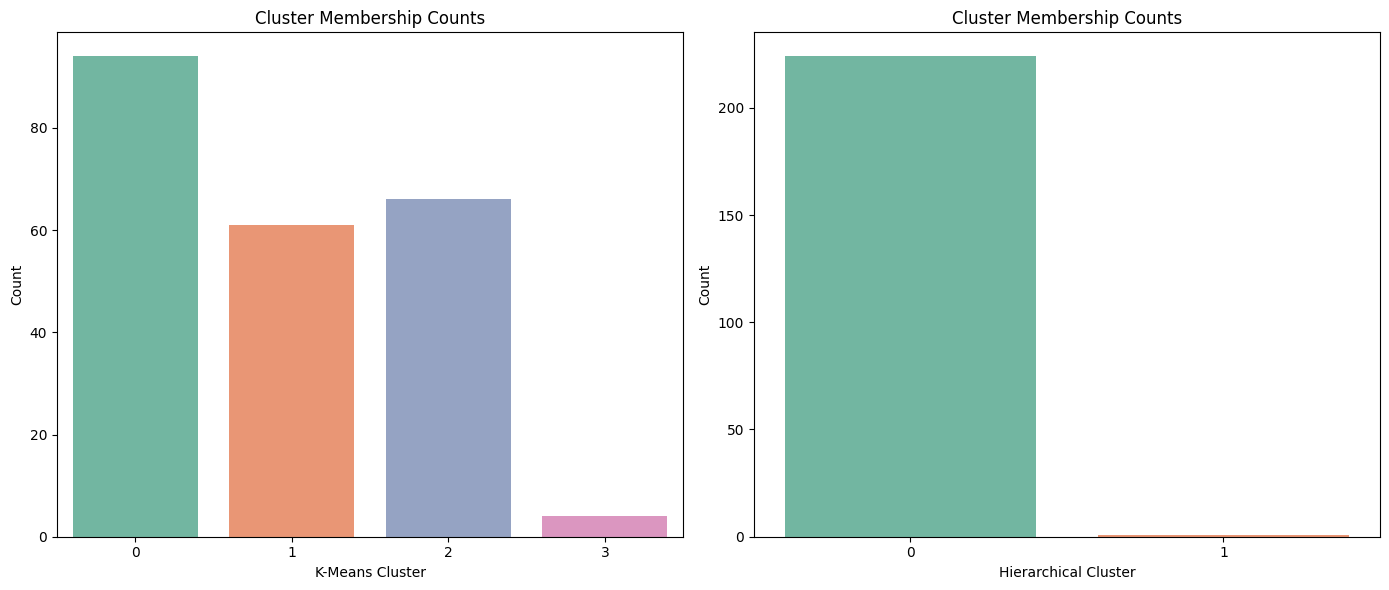

In [163]:
plt.figure(figsize=(14, 6))

# K-Means Clusters
plt.subplot(1, 2, 1)
sns.countplot(
    x='K-Means_Cluster',
    hue='K-Means_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Count')

# Hierarchical Clusters
plt.subplot(1, 2, 2)
sns.countplot(
    x='Hierarchical_Cluster',
    hue='Hierarchical_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Membership Counts')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

* The K-Means clustering model produces a more balanced distribution across four clusters, indicating that it successfully identifies distinct groups of countries with different COVID-19 characteristics.
* In contrast, hierarchical clustering assigns almost all countries to a single cluster, showing that it fails to capture meaningful variation in the dataset and provides limited segmentation for analysis.

### **World Map**

In [161]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="K-Means_Cluster",  # Color by K-Means Cluster for better readability
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by K-Means_Cluster"
)

fig.show()

The K-Means model successfully forms four distinct clusters that reflect meaningful differences across countries in population size, infection burden, and COVID-19 severity. Each cluster represents a unique profile, ranging from moderate-impact nations to high-burden regions and very large-population countries with substantial total cases. This balanced segmentation allows for clearer interpretation of global pandemic patterns and more actionable comparisons between country groups.

In [162]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Hierarchical_Cluster",  # Color by Hierarchical Cluster for better readability
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Hierarchical Cluster"
)

fig.show()

The Hierarchical model produces only two clusters, with nearly all countries falling into a single group and only one outlier forming the second cluster. This outcome indicates that the model fails to separate countries based on meaningful epidemiological differences, resulting in minimal interpretive value. The lack of diversity across clusters limits the model’s usefulness for understanding global COVID-19 variations or supporting targeted policy recommendations.

## **Cluster Profiling & Insights**

### **K-Means Clustering**

### **Cluster 0: Moderate Population, Moderate Risk Countries**
Profile:
* Moderate population size: ~32 million
* Moderate total cases (~777,000) and total deaths (~10,391)
* Low-to-medium deaths per million
* Majority located in Asia
* Death Percentage: ~1.94%
* Outbreak present but relatively controlled

Implication:
* Healthcare systems were able to manage caseloads
* Transmission occurred but did not escalate severely
* Potential risk of unnoticed spread if surveillance weakens

Government Policy Recommendations:
* Strengthen testing and tracing to prevent silent spread.
* Maintain vaccination campaigns to prevent future spikes.
* Improve public health communication to reduce complacency.

### **Cluster 1: Low Population, High Cases per Million, High Severity**
Profile:
* Smaller population sizes: ~4.2 million
* High cases per million and high deaths per million
* Total Cases: ~324,000
* Total Death: ~3,575
* Death percentage: ~1.05%
* Median deaths also elevated
* Mostly European countries
* Indicates dense population centers and aggressive viral spread

Implications:
* Healthcare systems likely experienced pressure
* Higher community transmission in compact regions
* Vulnerable to rapid outbreak escalation
Government Policy Recommendations:
* Increase ICU and emergency medical capacity
* Enforce targeted mobility restrictions during spikes
* Implement early-warning systems for new variants

### **Cluster 2: High Cases and High Death Burden Countries**
Profile:
* Extremely high total cases: ~17.8 million
* High total deaths: ~42,220
* Very high cases per million (Cases per 1M: ~308,400, Deaths per 1M: ~2,271)
* High overall severity and impact
* Many countries from Europe
* Death Percentage: ~1.08%

Implications:
* Significant healthcare overload during peak waves
* Evidence of widespread community transmission
* High fatality burden suggests resource strain

Government Policy Recommendations:
* Strengthen hospitals and long-term pandemic readiness
* Expand genomic surveillance for variant detection
* Promote vaccination to reduce hospitalization rates

### **Cluster 3: Very Large Population, Heavy Total Case Burden**
Profile:
* Very large populations: ~848 million
* Extremely high total cases
* High total deaths
* Cases per million high but driven by population scale
* Includes major global hotspots
* Death Percentage: ~1.91%

Implications:
* National healthcare systems faced sustained pressure
* Mass outbreaks amplified by population density
* Significant resource allocation challenges

Government Policy Recommendations:
* Prioritize mass vaccination and booster rollout
* Strengthen decentralized healthcare networks
* Build national stockpiles and rapid-response units

### **Hierarchical Clustering**

### **Cluster 0: Global Majority, Low-to-Moderate Impact Countries**
Profile:
* Contains 224 of 225 countries
* Population: ~33.7 million
* Moderate total cases and total deaths
* Moderate cases per million
* Low death percentage: ~1.44%
* Represents typical global COVID-19 patterns

Implications:
* Clustering model fails to differentiate countries
* Insufficient segmentation for meaningful insights
* Does not capture variation in severity across nations

Government Policy Recommendations:
* Maintain routine public health measures
* Continue vaccinations and testing
* Strengthen monitoring for at-risk groups

### **Cluster 1: Extreme Outlier (USA)**
Profile:
* Only one country in this cluster
* Population: ~334 million
* Extremely high total cases (~81.8 million)
* Extremely high total deaths (~1,008,000)
* Highest deaths per million (~3,015)
* Represents a statistical outlier

Implications:
* Hierarchical clustering isolates the outlier but fails for global segmentation
* Cannot be used for comparative insights
* Overemphasis on magnitude leads to cluster distortion

Government Policy Recommendations:
* Improve large-scale healthcare readiness
* Enhance federal-level pandemic coordination
* Invest in health equity programs for hard-hit communities

### **Conclusion for the Best Model**

Even though the hierarchical clustering model achieved a marginally higher silhouette score, K-Means emerges as the more effective and practical choice for this analysis. The K-Means algorithm successfully produced four well-defined clusters that capture meaningful real-world COVID-19 patterns. These clusters highlight differences in severity levels, population characteristics, and regional impacts, giving a much clearer picture of how the pandemic affected countries differently. As a result, K-Means enables richer interpretation, more detailed profiling, and more targeted policy recommendations. On the other hand, the hierarchical model grouped nearly the entire dataset into a single cluster, which eliminates the variability needed to understand global differences and limits the insights that can be drawn.

From a strategic and analytical standpoint, K-Means provides far more useful segmentation for guiding decision-making. Its clusters support governments and health agencies in distributing resources, identifying high-risk regions, and designing interventions based on evidence. Hierarchical clustering, despite its higher silhouette score, fails to produce meaningful distinctions and instead compresses diverse countries into a single category. This makes it less valuable for understanding pandemic patterns or informing public health strategies. Because of its clearer segmentation, stronger interpretability, and greater relevance to real-world policy needs, K-Means stands out as the superior model for this COVID-19 clustering project.